# HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

# How will you help this NGO to make a correct decision based on socio-economic and health factors?


In [139]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Load the dataset to Country_data variable
Country_data = pd.read_csv("Country-data.csv")

# Exploratory Data analysis

In [141]:
# Check the dataset attributes
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [142]:
# Check if any of the columns have null data
Country_data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [143]:
# Check if any of the rows are duplicated
Country_data.duplicated().any()

False

<AxesSubplot:>

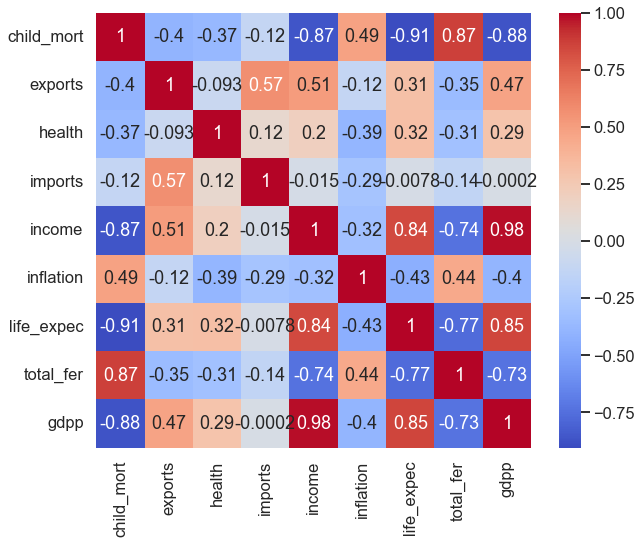

In [144]:
# Finding the correlation between the variables 
plt.figure(figsize=(10,8))
sns.heatmap(Country_data.corr(method='spearman'), square=True, cmap='coolwarm', annot=True)

In [145]:
corr_values = Country_data.corr(method='spearman')

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.sort_values(by = 'abs_correlation', ascending=False).head(10)


,feature1,feature2,correlation,abs_correlation
29,income,gdpp,0.978183,0.978183
5,child_mort,life_expec,-0.905604,0.905604
7,child_mort,gdpp,-0.875750,0.875750
6,child_mort,total_fer,0.869709,0.869709
3,child_mort,income,-0.866788,0.866788
34,life_expec,gdpp,0.851278,0.851278
27,income,life_expec,0.842012,0.842012
33,life_expec,total_fer,-0.766692,0.766692
28,income,total_fer,-0.740134,0.740134
35,total_fer,gdpp,-0.731430,0.731430


Inferences
1. Child Mortality rate decreases with Increase in GDPP. Both of them have a very high correlation, which is expected as developed contries(having higer GDPP) will have better healthcare and hence better chance of survival.

2. Child Mortality rate is directly proportional to total fertility rate. 

3. Child Mortality rate is iversely proportional to Life expectancy; ie if more number children unfortunately die too early it pulls down the overall life expectancy of the country.

4. Inflation is weakly inversely proportional to GDPP which in my opinion might be due to the economic saturation in highly developed nations.

5. Per capita Income is heavily correlated to GDPP because one is roughly a function of another.

6. Import and exports are somewhat interrelated; i.e, countries who export more are also likely to import something else more.

7. Spendings on health increase with GDPP and Income, which is self-explanatory.

8. Income rises with exports which might be because people generate income by generating goods and services which are later exported.

9. Child Mortality rate is iversely proportional to Healthcare expenditure and Income. Which shows that unfortunate circumstances with low income groups is often responsible for a low life expentancy among children.

# Draw the pairplot to check the data skew

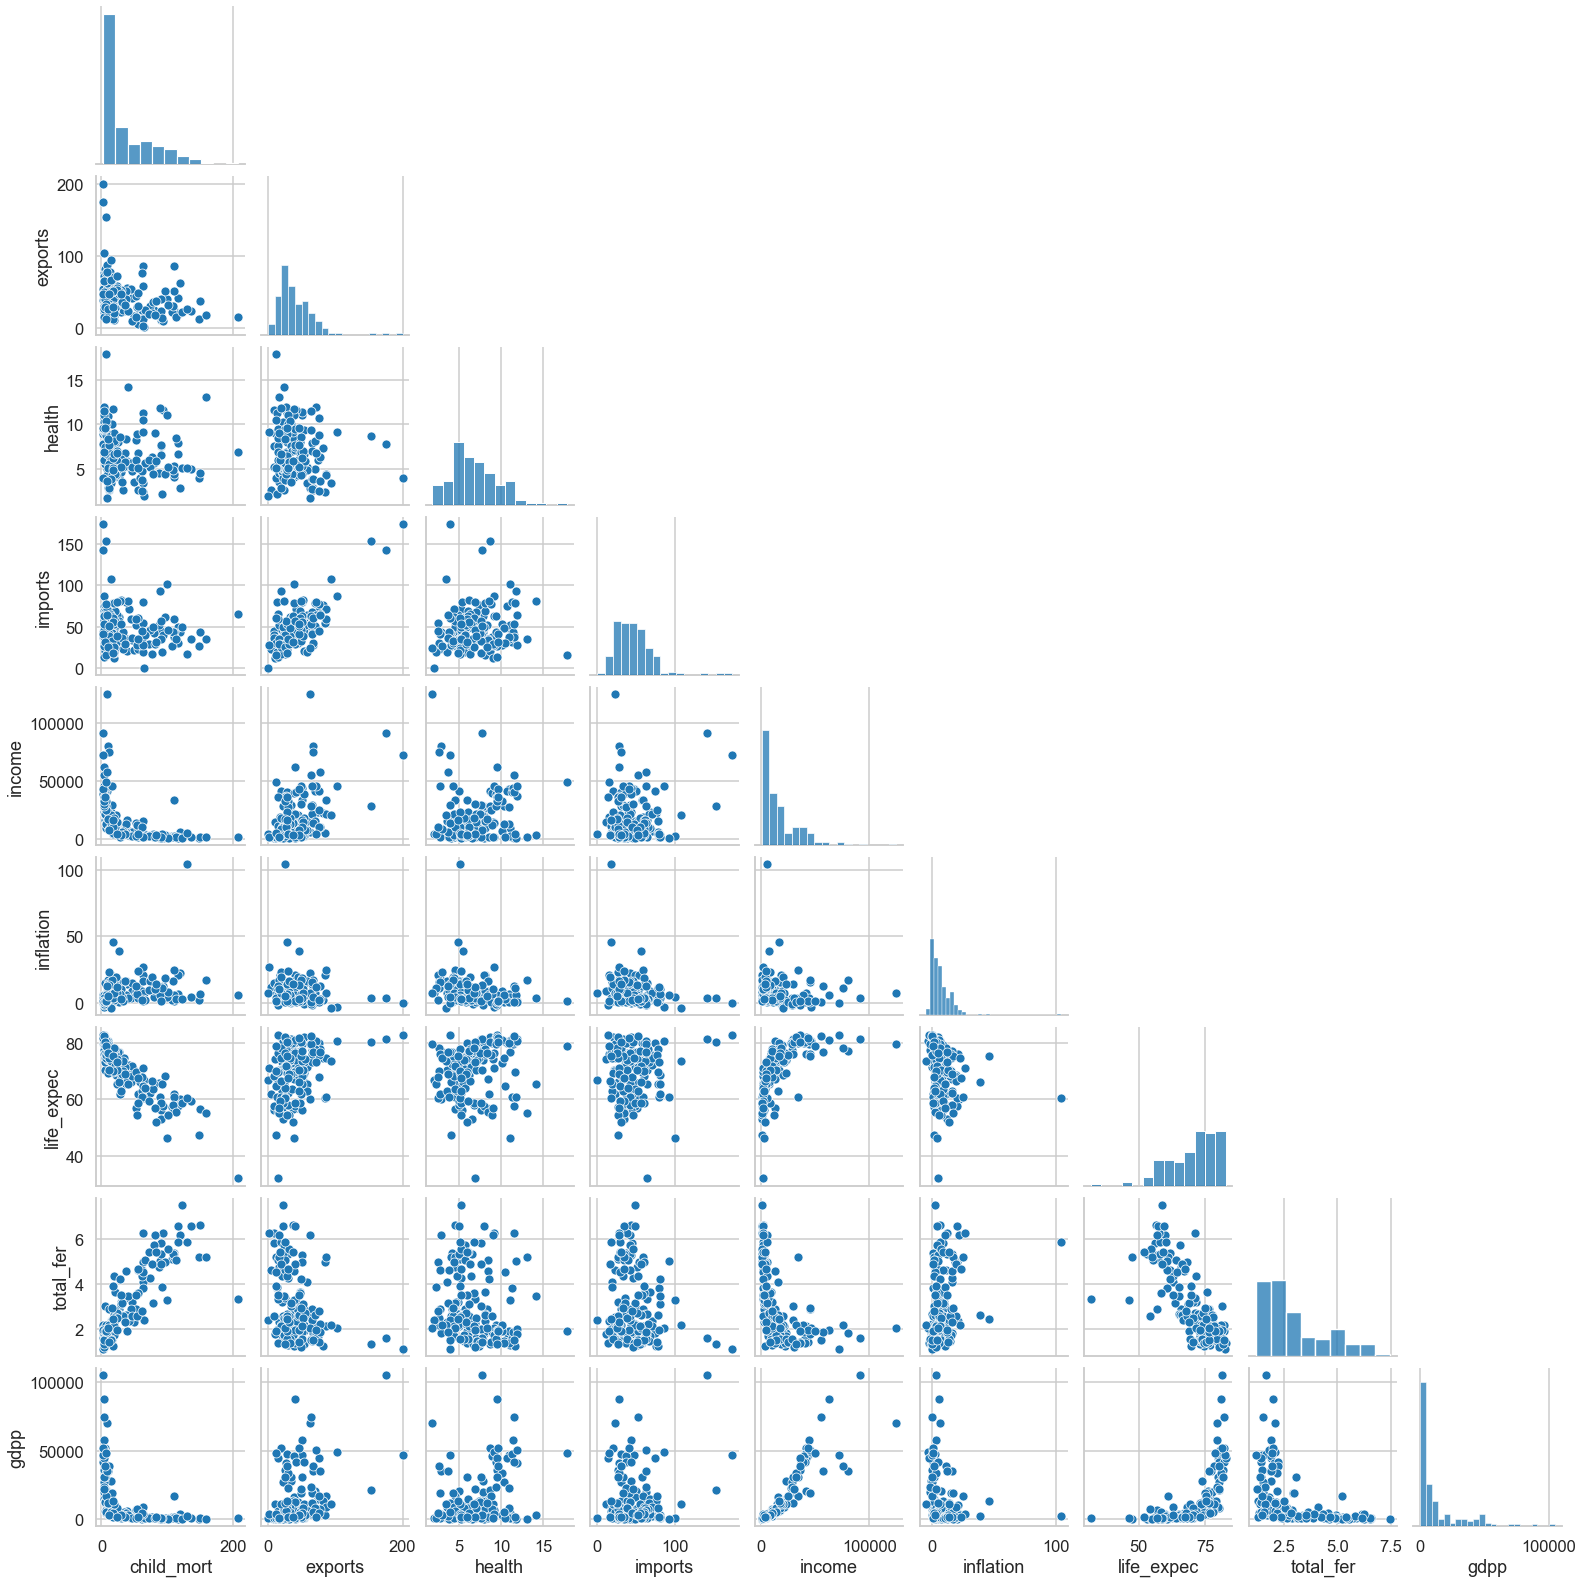

In [146]:
# Drawing the pairplot
sns.pairplot(data = Country_data,corner=True)

# Check the boxplot to detect the outliers

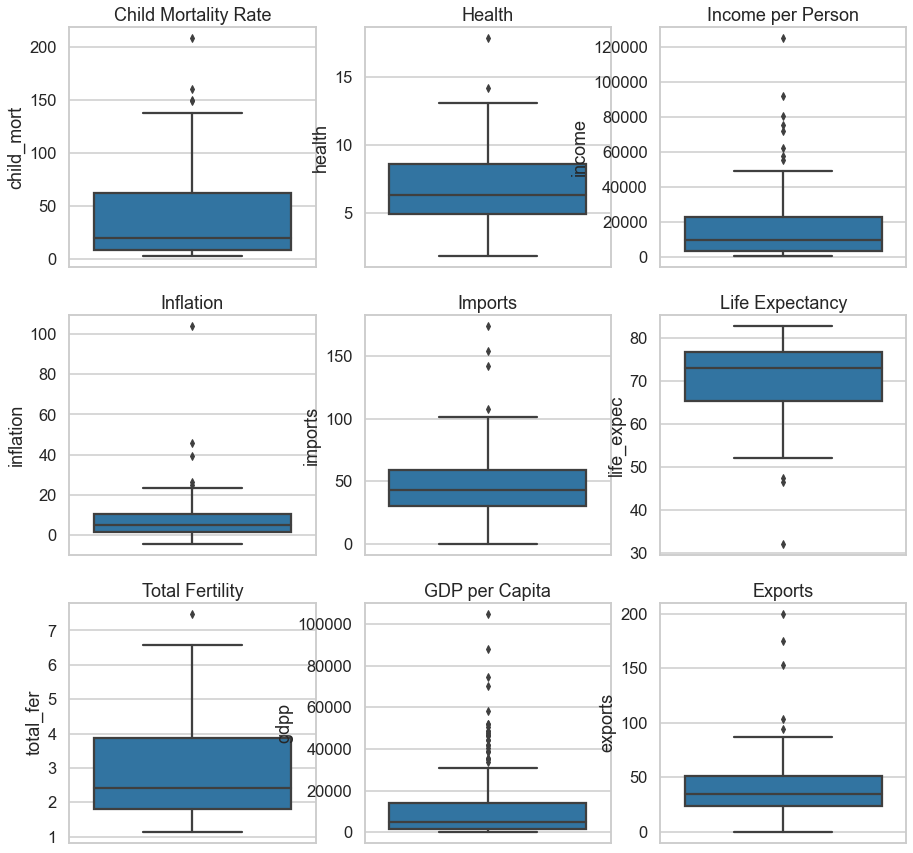

In [147]:
# Drawing the boxplot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=Country_data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=Country_data.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=Country_data.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=Country_data.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=Country_data.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=Country_data.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=Country_data.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=Country_data.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=Country_data.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

# There are some outliers in income, exports and imports
# But we have less data and therefore we don't have the freedom to delete what's existing

# Conclusions on first impressions

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


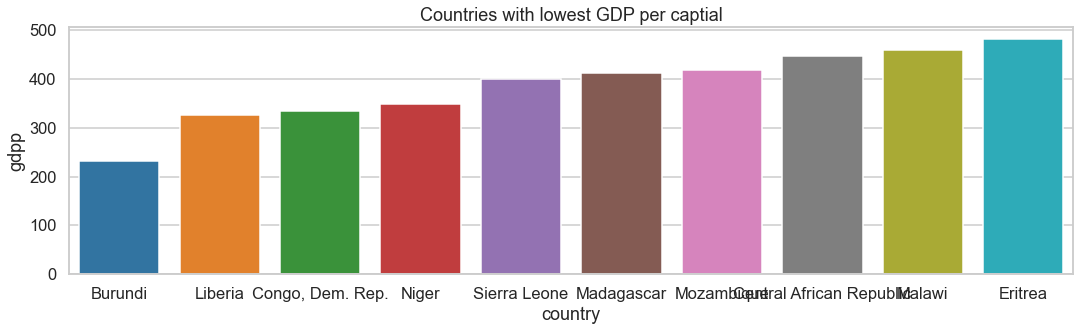

In [148]:
# Drawing inferences based on GDP
gdpp = Country_data.sort_values(by = ['gdpp'], ascending = True)
plt.figure(figsize = [18,10])
plt.subplot(2,1,1)
sns.barplot(gdpp['country'].head(10),gdpp['gdpp'].head(10))
plt.title('Countries with lowest GDP per captial')
plt.show()

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


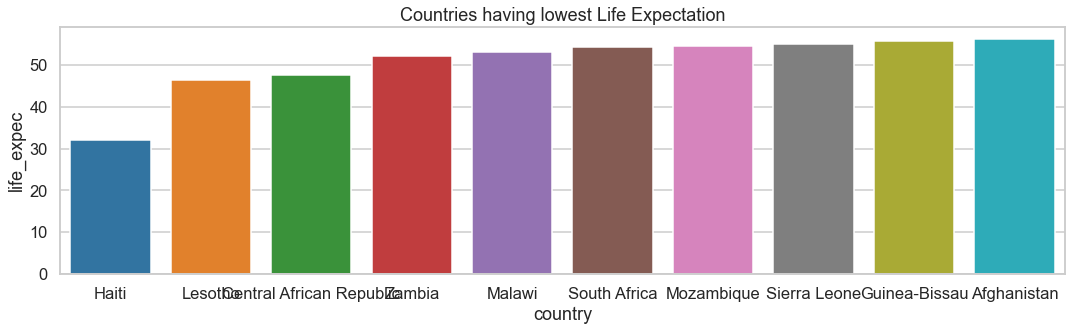

In [149]:
# Drawing inferences based on life expectency
life_expec = Country_data.sort_values(by = ['life_expec'], ascending = True)
plt.figure(figsize = [18,10])
plt.subplot(2,1,1)
sns.barplot(life_expec['country'].head(10),life_expec['life_expec'].head(10))
plt.title('Countries having lowest Life Expectation')
plt.show()

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\silpa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\silpa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

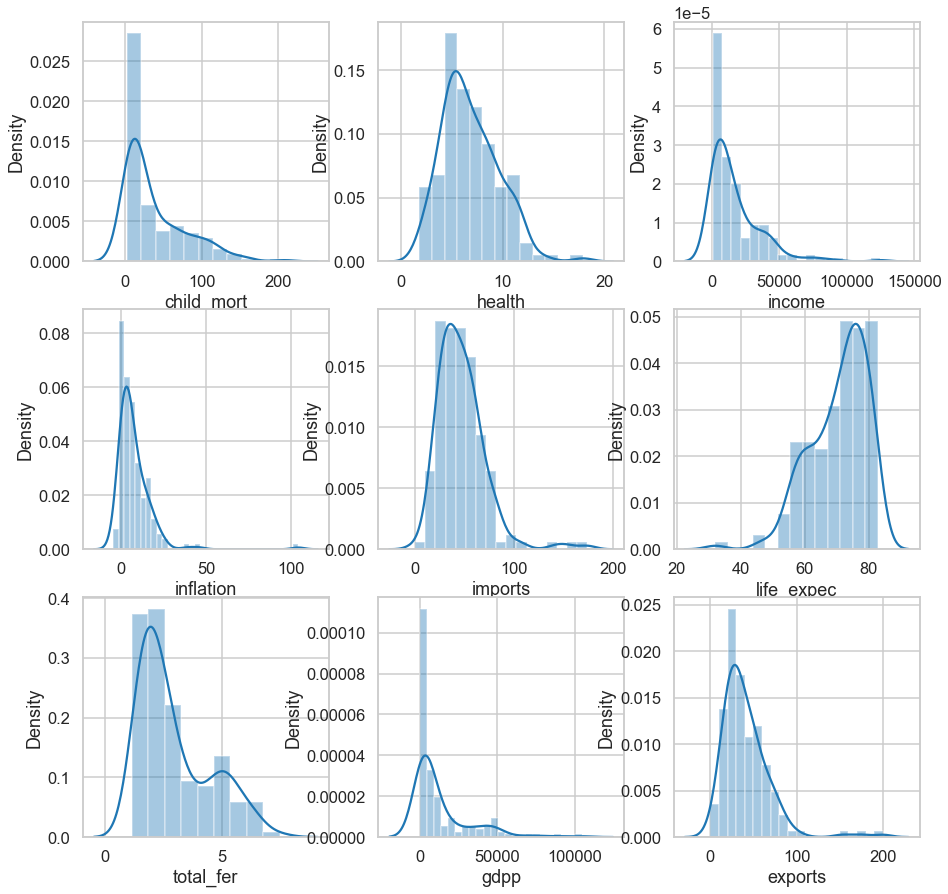

In [150]:
# Checking data skewness with distance plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
dp=sns.distplot(Country_data['child_mort'],ax=ax[0, 0])
dp=sns.distplot(Country_data['health'],ax=ax[0, 1])
dp=sns.distplot(Country_data['income'],ax=ax[0, 2])
dp=sns.distplot(Country_data['inflation'],ax=ax[1, 0])
dp=sns.distplot(Country_data['imports'],ax=ax[1,1])
dp=sns.distplot(Country_data['life_expec'],ax=ax[1, 2])
dp=sns.distplot(Country_data['total_fer'],ax=ax[2,0])
dp=sns.distplot(Country_data['gdpp'],ax=ax[2, 1])
dp=sns.distplot(Country_data['exports'],ax=ax[2,2])
#dp=sns.distplot(Country_data['Trade_Deficiency'],ax=ax[3,1])
#ax[3,0].axis('off')
#ax[3,2].axis('off')
plt.show()

# From the above plot, most of the average income per person and gdp per capita is observed in the range of 0-15000

# On average, we can infer that life expectancy of a person for most of the countries is observed between 60-80

# Child mortality (Death of children under 5 years of age per 1000 live births) seems to be below 50 in most of the countries, only few countries child mortality is above 100.

# Data Scaling using Standard scaler

In [151]:
from sklearn.preprocessing import StandardScaler

# scale the data
X = Country_data.drop(['country'], axis=1)
sc = StandardScaler()
X =  sc.fit_transform(X)


# Principal Component Analysis

In [152]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)


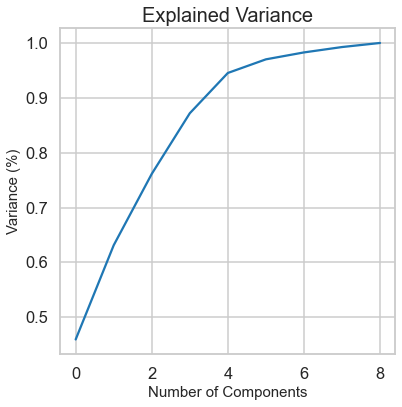

In [153]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

In [154]:
# The bend straightens at around 6 and therefore we can use 6 components

In [155]:
Country_data_pca = PCA(n_components=6).fit(X).transform(X)

# store it in a new data frame
Country_data_pca= pd.DataFrame(data = Country_data_pca, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3','principal component 4',
                                                        'principal component 5','principal component 6'])

Country_data_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919


# Kmeans Clustering 

C:\Users\silpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

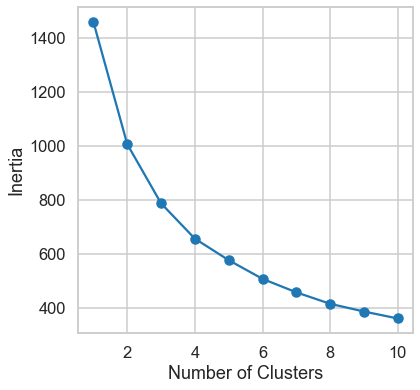

In [156]:
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(Country_data_pca)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [158]:
# We can use 3 clusters as seen from the elbow graph
kmeans = KMeans(n_clusters=3,random_state=42,init="k-means++")
y_kmeans = kmeans.fit_predict(Country_data_pca)

In [159]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [160]:
Country_data['cluster'] = y_kmeans

In [161]:
Country_data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
cluster         int32
dtype: object

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

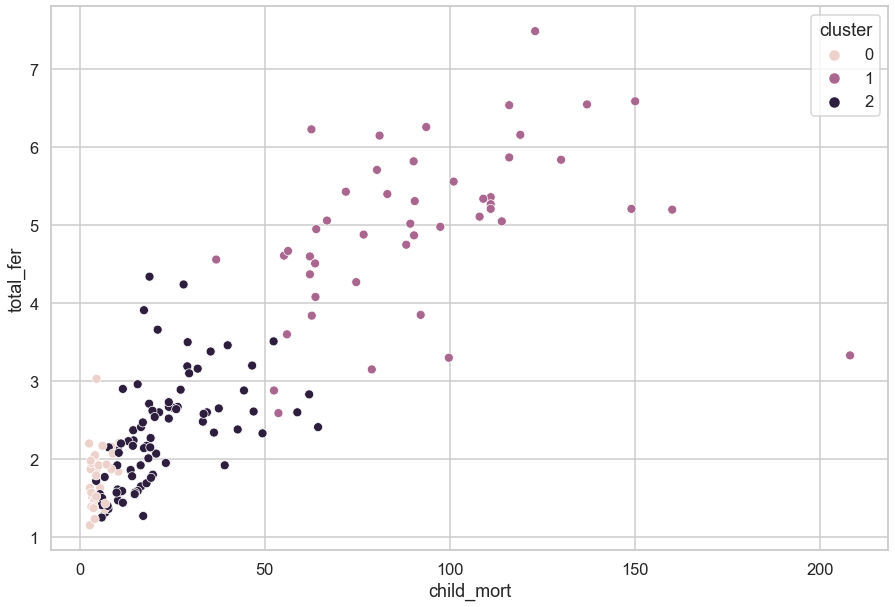

In [162]:
plt.figure(figsize = [15,10])
sns.scatterplot(x = 'child_mort', y = 'total_fer', data = Country_data, hue = 'cluster')

In [174]:
# Cluster 0 - Super Developed countries
Country_data[Country_data['cluster'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0


In [175]:
# Cluster 1 - Poor Countries - Needs funds immediately
Country_data[Country_data['cluster'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [179]:
# Cluster 1 - Developing countries - May need funds to maintain the progress
Country_data[Country_data['cluster'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,2
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2


In [180]:
# Checking India's category - Falls under the category 2 (Developing country)
Country_data[Country_data['country'] == 'India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,2


# Hierarchical Agglomerative Clustering

In [181]:
# silhouette index for agglomerative clustering
from sklearn.metrics import silhouette_score

range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    ward = ward.fit(Country_data_pca)
    preds = ward.fit_predict(Country_data_pca)
    
    score = silhouette_score (Country_data_pca, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3191607926985718
For n_clusters = 3, silhouette score is 0.288179135296118
For n_clusters = 4, silhouette score is 0.29964104390205104
For n_clusters = 5, silhouette score is 0.3042186736837986
For n_clusters = 6, silhouette score is 0.31849721685027094
For n_clusters = 7, silhouette score is 0.23567718971909987
For n_clusters = 8, silhouette score is 0.21583885528091987
For n_clusters = 9, silhouette score is 0.22850806345842348


C:\Users\silpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


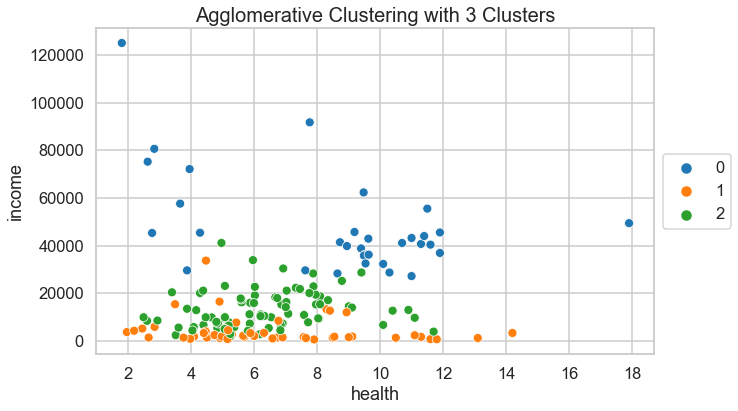

In [182]:
# Checking the scatter for agglomerative clustering based on Income and health
agglom = AgglomerativeClustering(n_clusters=3).fit(Country_data_pca)

Country_data['Labels'] = agglom.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(Country_data['health'], Country_data['income'], hue=Country_data['Labels'], 
                palette=sns.color_palette('tab10', 3))
plt.xlabel('health')
plt.ylabel('income')
plt.title('Agglomerative Clustering with 3 Clusters', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)

Text(0.5, 1.0, 'Dendrogram')

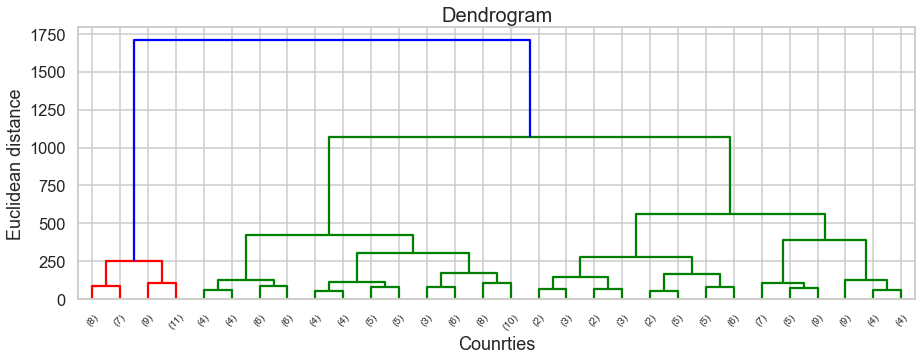

In [183]:
# Checking the dendrogram 
from scipy.cluster import hierarchy
HL = hierarchy.linkage(agglom.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

hierarchy.set_link_color_palette(['red', 'green'])

den = hierarchy.dendrogram(HL, orientation='top', 
                           p=30, truncate_mode='lastp',
                            show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')
plt.xlabel('Counrties')
plt.ylabel('Euclidean distance')
plt.title('Dendrogram', fontsize=20)

In [184]:
#k=3 gives good silhouette score
a=AgglomerativeClustering(3)
a.fit(Country_data_pca)
Country_data['hier_labels']=a.labels_

In [185]:
# Checking the grouping obtained based on K means clustering
Country_data.drop('hier_labels',axis=1).groupby(['cluster','country']).mean()

child_mort  exports  health  imports   income  inflation  \
cluster country                                                                
0       Australia          4.8     19.8    8.73     20.9  41400.0      1.160   
        Austria            4.3     51.3   11.00     47.8  43200.0      0.873   
        Bahrain            8.6     69.5    4.97     50.9  41100.0      7.440   
        Belgium            4.5     76.4   10.70     74.7  41100.0      1.880   
        Brunei            10.5     67.4    2.84     28.0  80600.0     16.700   
...                        ...      ...     ...      ...      ...        ...   
2       Uruguay           10.6     26.3    8.35     25.4  17100.0      4.910   
        Uzbekistan        36.3     31.7    5.81     28.5   4240.0     16.500   
        Vanuatu           29.2     46.6    5.25     52.7   2950.0      2.620   
        Venezuela         17.1     28.5    4.91     17.6  16500.0     45.900   
        Vietnam           23.3     72.0    6.84     80.2   4490.0     12.100   

                    life_expec  total_fer     gdpp  Labels  
cluster country                                             
0       Australia         82.0       1.93  51900.0     0.0  
        Austria           80.5       1.44  46900.0     0.0  
        Bahrain           76.0       2.16  20700.0     2.0  
        Belgium           80.0       1.86  44400.0     0.0  
        Brunei            77.1       1.84  35300.0     0.0  
...                        ...        ...      ...     ...  
2       Uruguay           76.4       2.08  11900.0     2.0  
        Uzbekistan        68.8       2.34   1380.0     2.0  
        Vanuatu           63.0       3.50   2970.0     2.0  
        Venezuela         75.4       2.47  13500.0     1.0  
        Vietnam           73.1       1.95   1310.0     2.0  

[167 rows x 10 columns]

In [186]:
# Grouping by hierarchial cluster label
Country_data.drop('cluster',axis=1).groupby(['hier_labels','country']).mean()

child_mort  exports  health  imports   income  \
hier_labels country                                                     
0           Australia          4.8     19.8    8.73     20.9  41400.0   
            Austria            4.3     51.3   11.00     47.8  43200.0   
            Belgium            4.5     76.4   10.70     74.7  41100.0   
            Brunei            10.5     67.4    2.84     28.0  80600.0   
            Canada             5.6     29.1   11.30     31.0  40700.0   
...                            ...      ...     ...      ...      ...   
2           Ukraine           11.7     47.1    7.72     51.1   7820.0   
            Uruguay           10.6     26.3    8.35     25.4  17100.0   
            Uzbekistan        36.3     31.7    5.81     28.5   4240.0   
            Vanuatu           29.2     46.6    5.25     52.7   2950.0   
            Vietnam           23.3     72.0    6.84     80.2   4490.0   

                        inflation  life_expec  total_fer     gdpp  Labels  
hier_labels country                                                        
0           Australia       1.160        82.0       1.93  51900.0     0.0  
            Austria         0.873        80.5       1.44  46900.0     0.0  
            Belgium         1.880        80.0       1.86  44400.0     0.0  
            Brunei         16.700        77.1       1.84  35300.0     0.0  
            Canada          2.870        81.3       1.63  47400.0     0.0  
...                           ...         ...        ...      ...     ...  
2           Ukraine        13.400        70.4       1.44   2970.0     2.0  
            Uruguay         4.910        76.4       2.08  11900.0     2.0  
            Uzbekistan     16.500        68.8       2.34   1380.0     2.0  
            Vanuatu         2.620        63.0       3.50   2970.0     2.0  
            Vietnam        12.100        73.1       1.95   1310.0     2.0  

[167 rows x 10 columns]

In [187]:
# Function for adding the additional column which will categorize the type of assistance / funding needed
def func(x):
    if x==2:
        return 'Top priority - Release fund'
    elif x==1:
        return 'Medium priority - Assistance needed'
    else:
        return 'No Help needed'
Country_data['hier_labels']=Country_data['hier_labels'].map(lambda x: func(x))

In [188]:
Country_data.tail(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Labels,hier_labels
117,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8080,2,2,Top priority - Release fund
118,Paraguay,24.1,55.1,5.87,51.5,7290,6.100,74.1,2.73,3230,2,2,Top priority - Release fund
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5020,2,2,Top priority - Release fund
120,Philippines,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130,2,2,Top priority - Release fund
121,Poland,6.0,40.1,7.46,42.1,21800,1.660,76.3,1.41,12600,2,2,Top priority - Release fund
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,0,0,No Help needed
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,0,0,No Help needed
124,Romania,11.5,32.6,5.58,38.8,17800,3.530,73.7,1.59,8230,2,2,Top priority - Release fund
125,Russia,10.0,29.2,5.08,21.1,23100,14.200,69.2,1.57,10700,2,2,Top priority - Release fund
126,Rwanda,63.6,12.0,10.50,30.0,1350,2.610,64.6,4.51,563,1,1,Medium priority - Assistance needed


In [189]:
print('Based on Hierarchial clustering, the countries which need help on top priority are:')
Country_data.loc[Country_data['hier_labels']=='Top priority - Release fund']['country'].to_list()

Based on Hierarchial clustering, the countries which need help on top priority are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Thailand',
 'Tonga',
 'Tunisia',


# Conclusion 

1. We used both K Means and heirarchial clustering to understand which countries need immediate fund/assistance for development
2. The model needs to be further fine-tuned since results on both models have slight variation


In [ ]:
Submitted by Viswaraj Chandran , Harikrishnan Bhuvanendran , Aneesh Akramannil